In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [409]:
file_path = "Data/sampled_data.csv" 
df_INIT = pd.read_csv(file_path)

## EDA (Exploratory Data Analysis)
___


In [368]:
df_INIT.shape

(500, 50)

In [369]:
df_INIT.head()

,image_url_1,category,style,colors,gender,pattern,occasion,accessory_type,more_attributes,bag_type,...,shorts_type,slippers-shoe_type,sneakers_type,sportswear_type,sweatshirt_type,swimwear_type,tank_type,bottoms_type,barcode,brand
0,https://fotos.skm.be/article/489205/489205_02_...,shirt,casual,magenta; multicolor; white,female,shapes,semi-formal; summer,NaN,buttons,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48920502040101,ETERNA
1,https://fotos.skm.be/article/507927/507927_01_...,sweater,casual,coral; magenta; multicolor,female,chevron; harlequin,winter,NaN,embroidered,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50792701020101,Geisha
2,https://fotos.skm.be/article/505938/505938_01_...,trousers_and_chinos,business,gray,female,houndstooth,semi-formal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,classic-trousers,50593801040101,TONI
3,https://fotos.skm.be/article/479883/479883_01_...,skirt,feminine,blue; multicolor; navy,female,stripes; vertical-stripes,casual; semi-formal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47988301030101,Nümph
4,https://fotos.skm.be/article/483726/483726_01_...,dress,feminine,emerald-green; multicolor; mustard,female,floral,dating,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48372601080101,Verpass


In [370]:
df_INIT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   image_url_1                  500 non-null    object 
 1   category                     500 non-null    object 
 2   style                        494 non-null    object 
 3   colors                       478 non-null    object 
 4   gender                       495 non-null    object 
 5   pattern                      421 non-null    object 
 6   occasion                     494 non-null    object 
 7   accessory_type               0 non-null      float64
 8   more_attributes              155 non-null    object 
 9   bag_type                     0 non-null      float64
 10  belt_type                    0 non-null      float64
 11  material                     203 non-null    object 
 12  tops_fit                     240 non-null    object 
 13  sleeve_type         

In [371]:
def plot_multivalued_column(df, column_name, separator=";"):
    """
    Function to plot the distribution of a column that contains multiple attributes per row.

    Parameters:
    df (DataFrame): The dataset.
    column_name (str): The name of the column to visualize.
    separator (str): The separator used to split multiple attributes (default is "; ").
    """
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the dataset.")
        return

    # Drop NaN values, convert to string, and split attributes
    df_expanded = (
        df[column_name].dropna().astype(str)
        .str.split(separator)  # Split values into lists
        .explode()  # Expand into separate rows
        .str.strip()  # Remove leading/trailing spaces
    )
   
    # Get correct value counts
    attribute_counts = df_expanded.value_counts()

    # Plot the distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(y=attribute_counts.index, x=attribute_counts.values, palette="coolwarm")
    plt.title(f"Distribution of Attributes in {column_name}")
    plt.xlabel("Count")
    plt.ylabel("Attributes")
    plt.show()

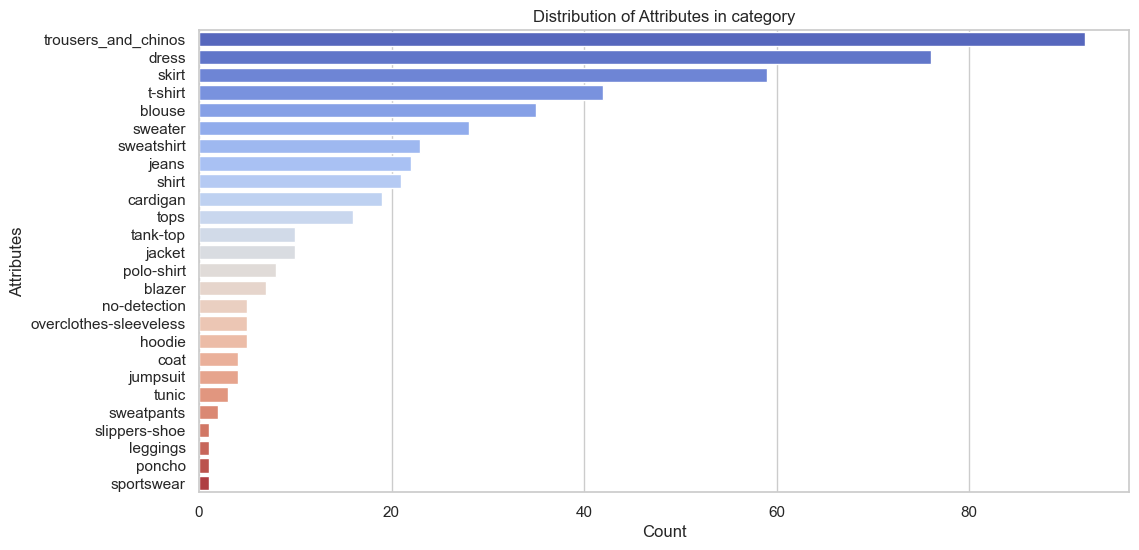

In [372]:
plot_multivalued_column(df_INIT,"category")

There is one attribute called No detection that is seems does not belong with the category need to be removed

In [373]:
df_INIT = df_INIT[df_INIT['category'] != 'no-detection']

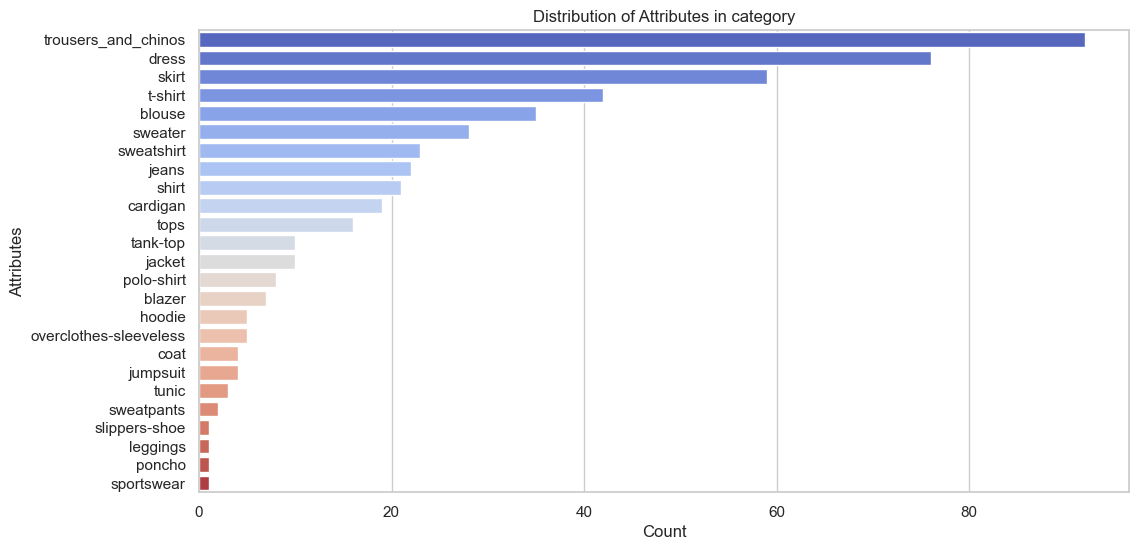

In [374]:
plot_multivalued_column(df_INIT,"category")

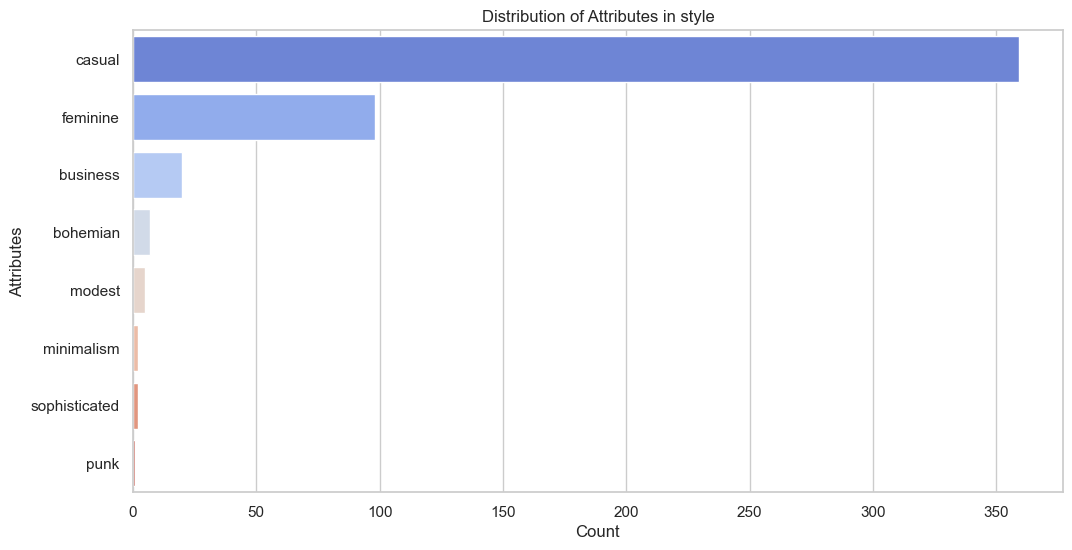

In [375]:
plot_multivalued_column(df_INIT,"style")

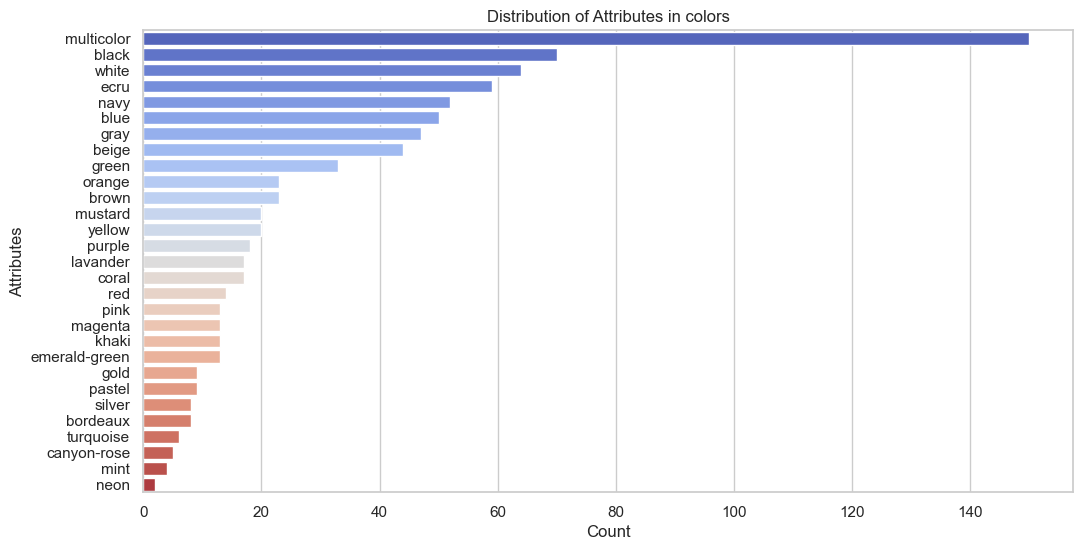

In [376]:
plot_multivalued_column(df_INIT,"colors")

As observed, the attribute "multicolor" indicates the presence of more than one color, but it's not necessary for our analysis and can be removed.

In [377]:
df_INIT["colors"] = df_INIT["colors"].astype(str).apply(lambda x: ";".join([color.strip() for color in x.split(";") if color.strip().lower() != "multicolor"]) if x != "nan" else x)

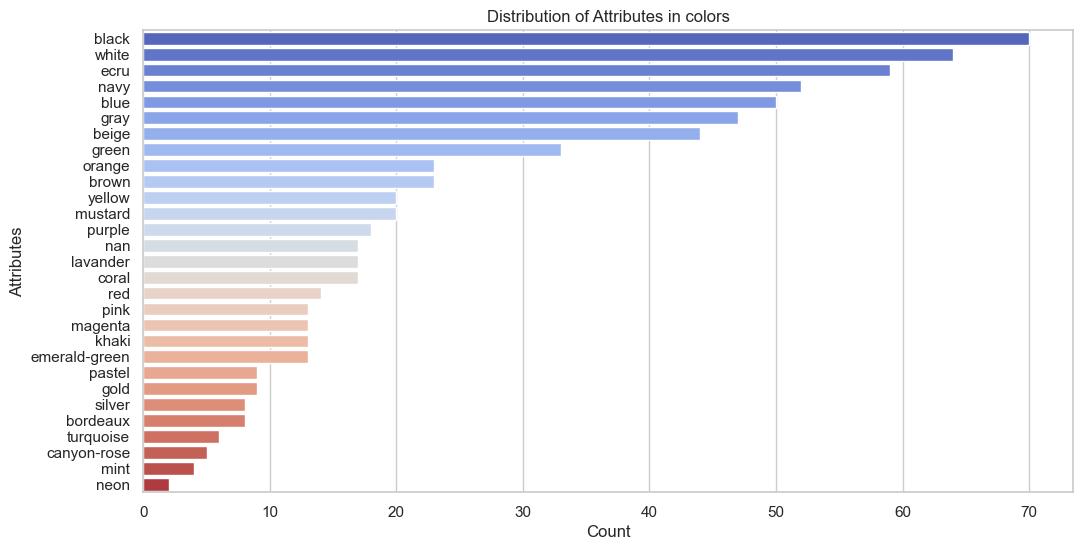

In [378]:
plot_multivalued_column(df_INIT,"colors")

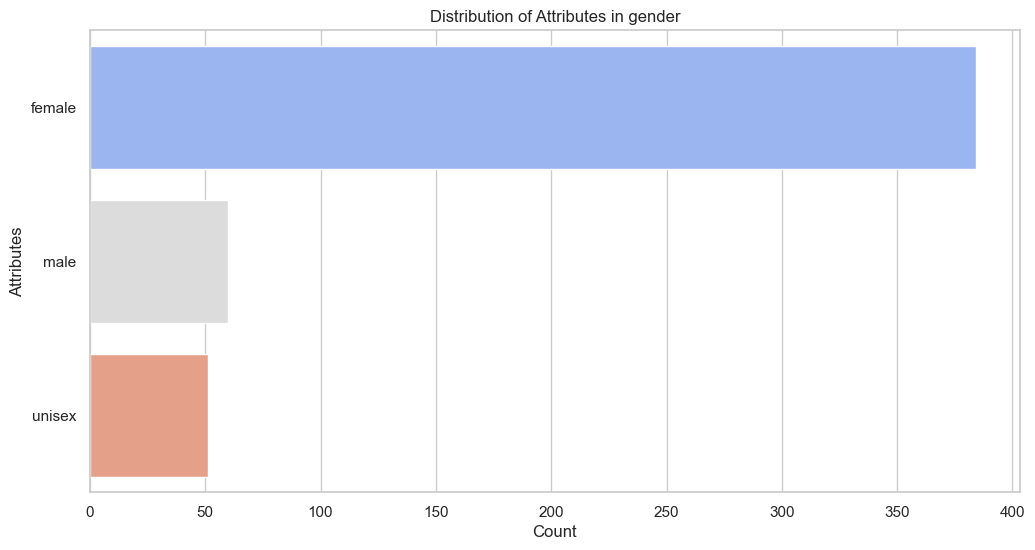

In [379]:
plot_multivalued_column(df_INIT,"gender")

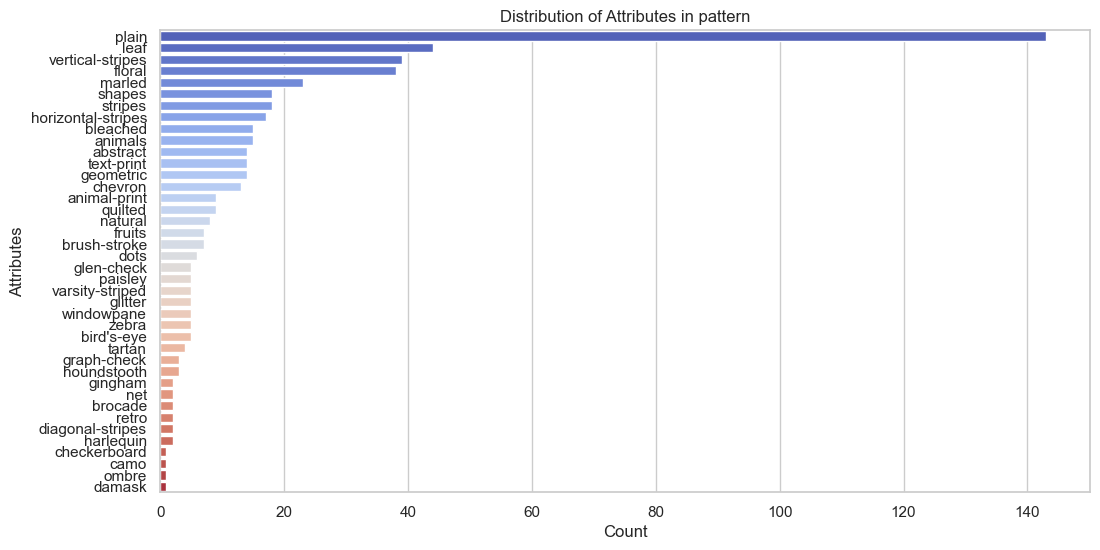

In [380]:
plot_multivalued_column(df_INIT,"pattern")

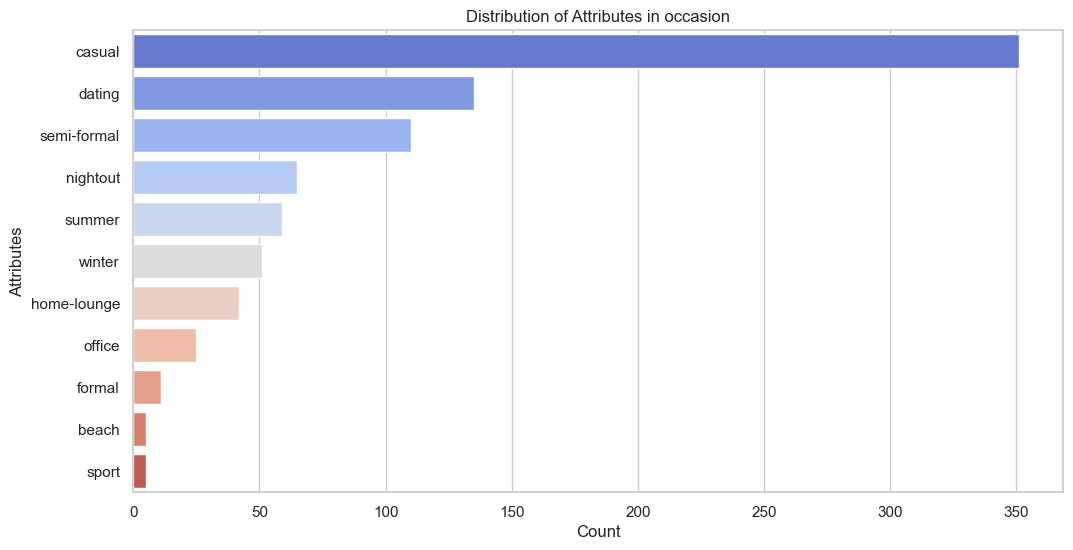

In [381]:
plot_multivalued_column(df_INIT,"occasion")

Our dataset originally contains 500 rows and 50 columns. However, some columns have missing values. First, we will check for any duplicate values. Then, we will review the columns to identify if any attributes can be merged to eliminate missing values. For the remaining missing values, we will either:

1. Fill them using a logical approach or domain knowledge.
2. Remove the column if it is not important for our analysis.
3. Remove the row if it contains missing values that are not significant.

## Removing duplicate
___

In [382]:

value_counts = df_INIT['barcode'].value_counts()
print(value_counts)

barcode
49836901040101    3
47988301030101    3
48414801040101    2
47835101030101    2
49246501030101    2
                 ..
48122101030101    1
50496701030101    1
49958901020101    1
48639401050101    1
50548101050101    1
Name: count, Length: 477, dtype: int64


In [383]:
duplicates = df_INIT[df_INIT.duplicated(subset=['barcode'], keep="first")]

print("Duplicate rows based on the specified column:")
print(duplicates)

Duplicate rows based on the specified column:
                                           image_url_1             category  \
91   https://fotos.skm.be/article/503364/503364_01_...                skirt   
147  https://fotos.skm.be/article/491749/491749_01_...                dress   
157  https://fotos.skm.be/article/510218/510218_01_...               blouse   
210  https://fotos.skm.be/article/479883/479883_01_...                skirt   
215  https://fotos.skm.be/article/477552/477552_01_...                skirt   
267  https://fotos.skm.be/article/497677/497677_01_...                dress   
336  https://fotos.skm.be/article/484148/484148_01_...                skirt   
347  https://fotos.skm.be/article/495647/495647_05_...  trousers_and_chinos   
370  https://fotos.skm.be/article/487242/487242_01_...                skirt   
373  https://fotos.skm.be/article/479883/479883_01_...                skirt   
378  https://fotos.skm.be/article/492465/492465_01_...                skirt   
388  h

We can see that we have 482 Unique value and 18 duplicate 

In [384]:
df_unique = df_INIT.drop_duplicates(subset=['barcode'])
df_unique.shape
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   image_url_1                  477 non-null    object 
 1   category                     477 non-null    object 
 2   style                        476 non-null    object 
 3   colors                       477 non-null    object 
 4   gender                       477 non-null    object 
 5   pattern                      405 non-null    object 
 6   occasion                     476 non-null    object 
 7   accessory_type               0 non-null      float64
 8   more_attributes              150 non-null    object 
 9   bag_type                     0 non-null      float64
 10  belt_type                    0 non-null      float64
 11  material                     197 non-null    object 
 12  tops_fit                     238 non-null    object 
 13  sleeve_type              

### Steps to Handle Missing Values and Data Merging

1. **Merge Attributes**: Where applicable, combine multiple attributes from different columns to fill in missing values. This approach can help generate more comprehensive information from existing data.

2. **Handle Missing Values**:
   - **Impute Missing Values**: Apply logical or domain-specific methods to impute or fill missing values. This could involve using statistical measures, such as the mean, median, or mode, or more advanced techniques based on the context of the data.
   - **Drop Irrelevant Columns**: Identify and remove columns that are not essential for the analysis or that don't contribute meaningful information to the dataset.
   - **Drop Irrelevant Rows**: Remove rows containing missing values that do not impact the overall dataset, especially if these rows are not crucial for your analysis or prediction objectives.

---

## Merging Colomn
___

### merging bottom_fit and top_fit into one colomn called "fit"
We are combining the bottom_fit and top_fit columns into a new column called fit. To ensure consistency, we map the attributes from both columns into standardized fit categories.

For the bottom_fit column, the various fit types, such as "straight-fit-bottoms" and "slim-bottoms", are grouped into broader categories like "Regular Fit", "Slim Fit", "Oversized Fit", and "Flared Fit".

For the top_fit column, attributes like "regular-fit-tops" and "oversized-tops" are similarly mapped to fit categories like "Regular Fit", "Oversized Fit", and "Slim Fit".

By applying these mappings, we can combine the two columns into one, creating a unified fit column that represents the overall fit for both tops and bottoms in the dataset.

In [385]:
df_merge_fit =df_unique.copy()

bottom_fit_mapping = {
    "straight-fit-bottoms": "Regular_Fit",
    "slim-bottoms": "Slim_Fit",
    "skinny-bottoms": "Slim_Fit",
    "oversized-bottoms": "Oversized_Fit",
    "wide-bottoms": "Oversized_Fit",
    "flare-bottoms": "Flared_Fit"
}

# Mapping for tops_fit
top_fit_mapping = {
    "regular-fit-tops": "Regular_Fit",
    "oversized-tops": "Oversized_Fit",
    "bodycon-tops": "Slim_Fit",
    "fitted-tops": "Slim_Fit"
}

# Apply mapping while keeping NaN values
df_merge_fit.loc[:, 'bottoms_fit'] = df_merge_fit['bottoms_fit'].map(bottom_fit_mapping)
df_merge_fit.loc[:, 'tops_fit'] = df_merge_fit['tops_fit'].map(top_fit_mapping)

# Function to combine both fits
def combine_fits(row):
    top = row['tops_fit']
    bottom = row['bottoms_fit']
    
    if pd.isna(top) and pd.isna(bottom):
        return None  # Keep NaN if both are missing
    elif pd.isna(top):
        return bottom  # Keep bottom if top is missing
    elif pd.isna(bottom):
        return top  # Keep top if bottom is missing
    elif top == bottom:
        return top  # Keep only one if both are the same
    else:
        return f"{top}; {bottom}"  # Combine both with "; "


# Apply function to create 'fit' column
df_merge_fit.loc[:, 'fit'] = df_merge_fit.apply(combine_fits, axis=1)
df_merge_fit = df_merge_fit.drop(columns=['tops_fit', 'bottoms_fit'])
# Print unique values with counts
print(df_merge_fit['fit'].value_counts(dropna=False))

df_merge_fit.info()

fit
Regular_Fit                   188
None                          125
Oversized_Fit                  82
Slim_Fit                       73
Flared_Fit                      7
Oversized_Fit; Slim_Fit         1
Regular_Fit; Oversized_Fit      1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 499
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   image_url_1                  477 non-null    object 
 1   category                     477 non-null    object 
 2   style                        476 non-null    object 
 3   colors                       477 non-null    object 
 4   gender                       477 non-null    object 
 5   pattern                      405 non-null    object 
 6   occasion                     476 non-null    object 
 7   accessory_type               0 non-null      float64
 8   more_attributes              150 non-null    ob

### Merging Columns Containing the Type Attribute into One Column
The goal is to consolidate several columns that represent different types of attributes into one unified column. These columns typically contain various categories or classifications of clothing types such as sleeve types, neckline types, and so on. We aim to merge these columns into a single column, providing a more streamlined representation of the data.

In [386]:
type_columns = [col for col in df_merge_fit.columns if 'type' in col.lower()]

# Print the columns that contain "type"
print(type_columns)

['accessory_type', 'bag_type', 'belt_type', 'sleeve_type', 'blazer_neckline_type', 'neckline_type', 'boots-shoe_type', 'bracelet_type', 'overclothes_neckline_type', 'overclothes_type', 'waist_type', 'skirt_type', 'glasses_type', 'headwear_type', 'necklet_type', 'neckwear_type', 'overclothes-sleeveless_type', 'poncho_type', 'sandals-shoe_type', 'shorts_type', 'slippers-shoe_type', 'sneakers_type', 'sportswear_type', 'sweatshirt_type', 'swimwear_type', 'tank_type', 'bottoms_type']


In [387]:
df_merge_Type =df_merge_fit.copy()
# Combine values of the selected columns into one column 'Type'
df_merge_Type['Type'] = df_merge_Type[type_columns].apply(lambda row: ' '.join(row.fillna('').astype(str)), axis=1)
df_merge_Type['Type'] = df_merge_Type['Type'].apply(lambda x: ';'.join(str(val) for val in x.split() if val) if x.strip() != '' else None
)

df_merge_Type.drop(columns=type_columns, inplace=True)
print(df_merge_Type['Type'])

0             straight-sleeve;high-neck
1           straight-sleeve;turtle-neck
2           high-waist;classic-trousers
3                     high-waist;a-line
4         straight-sleeve;v-neck;pencil
                     ...               
494         high-waist;classic-trousers
495      straight-sleeve;notched-collar
496    straight-sleeve;boat-neck;pencil
498              straight-sleeve;v-neck
499                     straight-sleeve
Name: Type, Length: 477, dtype: object


In [388]:
for value in df_merge_Type['Type']:
    print(value)

straight-sleeve;high-neck
straight-sleeve;turtle-neck
high-waist;classic-trousers
high-waist;a-line
straight-sleeve;v-neck;pencil
straight-sleeve;crew-neck
straight-sleeve
puff-sleeve;boat-neck
straight-sleeve;v-neck
mid-waist;classic-trousers
straight-sleeve;grandad
crew-neck
straight-sleeve;boat-neck
straight-sleeve;v-neck
crew-neck
flutter-sleeve;shoulder-off;pencil
straight-sleeve;v-neck;a-line
high-waist
high-waist;casual
puff-sleeve;polo;a-line
high-waist;a-line
puff-sleeve;v-neck
straight-sleeve;v-neck;a-line
v-neck;a-line
high-waist;classic-trousers
straight-sleeve;v-neck;a-line
straight-sleeve;high-neck
straight-sleeve;crew-neck
mid-waist;classic-trousers
high-waist;a-line
round-neck;sleeveless
high-waist;a-line
straight-sleeve;high-neck;everyday-overclothes
round-neck
straight-sleeve;v-neck;a-line
straight-sleeve;v-neck;a-line
mid-waist;classic-trousers
straight-sleeve;cutaway;denim-overclothes
mid-waist;classic-trousers
crew-neck
high-waist;chinos
boat-neck
boat-neck
straigh

In [389]:
df_merge_Type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   image_url_1             477 non-null    object 
 1   category                477 non-null    object 
 2   style                   476 non-null    object 
 3   colors                  477 non-null    object 
 4   gender                  477 non-null    object 
 5   pattern                 405 non-null    object 
 6   occasion                476 non-null    object 
 7   more_attributes         150 non-null    object 
 8   material                197 non-null    object 
 9   tops_length             234 non-null    object 
 10  overclothes_closure     44 non-null     object 
 11  underarm_sleeve_length  21 non-null     object 
 12  sleeve_length           232 non-null    object 
 13  heels_width             0 non-null      float64
 14  heels_height            1 non-null      object 

### Merging Length-Related Columns into a Single Column
We will merge multiple columns representing different length attributes into one unified column. These columns usually contain various categories or classifications related to clothing length.

In [390]:
length_columns = [col for col in df_merge_Type.columns if 'length' in col.lower()]

# Print the columns that contain "length"
print(length_columns)

['tops_length', 'underarm_sleeve_length', 'sleeve_length', 'bottoms_length', 'skirt_length', 'jumpsuit_length']


In [391]:
df_merge_lenghth =df_merge_Type.copy()
# Combine values of the selected columns into one column 'Type'
df_merge_lenghth['lenghth'] = df_merge_lenghth[length_columns].apply(lambda row: ' '.join(row.fillna('').astype(str)), axis=1)
df_merge_lenghth['lenghth'] = df_merge_lenghth['lenghth'].apply(lambda x: ';'.join(str(val) for val in x.split() if val) if x.strip() != '' else None
)

df_merge_lenghth.drop(columns=length_columns, inplace=True)
print(df_merge_lenghth['lenghth'])

0             short;long-sleeve
1             short;long-sleeve
2                   full-length
3                          midi
4               3-4-sleeve;midi
                 ...           
494                    3-4-long
495    thigh-length;long-sleeve
496             3-4-sleeve;mini
498           short;long-sleeve
499           short;long-sleeve
Name: lenghth, Length: 477, dtype: object


In [392]:
df_merge_lenghth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 499
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_url_1          477 non-null    object 
 1   category             477 non-null    object 
 2   style                476 non-null    object 
 3   colors               477 non-null    object 
 4   gender               477 non-null    object 
 5   pattern              405 non-null    object 
 6   occasion             476 non-null    object 
 7   more_attributes      150 non-null    object 
 8   material             197 non-null    object 
 9   overclothes_closure  44 non-null     object 
 10  heels_width          0 non-null      float64
 11  heels_height         1 non-null      object 
 12  shoe_material        0 non-null      float64
 13  barcode              477 non-null    int64  
 14  brand                477 non-null    object 
 15  fit                  352 non-null    object 


now we can see that we have 18 column 

### Drop Irrelevant Columns
___

For the columns more_attributes, material, overclothes_closure, heels_width, heels_height, and shoe_material, which contain a significant amount of missing values, we have decided not to include them in our analysis. Therefore, we will remove these columns from the dataset.

In [393]:
df_filtered =df_merge_lenghth.copy()
columns_to_remove = ['more_attributes', 'material', 'overclothes_closure', 
                     'heels_width', 'heels_height', 'shoe_material']

# Remove these columns from the DataFrame
df_filtered.drop(columns=columns_to_remove, inplace=True)

In [394]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_url_1  477 non-null    object
 1   category     477 non-null    object
 2   style        476 non-null    object
 3   colors       477 non-null    object
 4   gender       477 non-null    object
 5   pattern      405 non-null    object
 6   occasion     476 non-null    object
 7   barcode      477 non-null    int64 
 8   brand        477 non-null    object
 9   fit          352 non-null    object
 10  Type         477 non-null    object
 11  lenghth      475 non-null    object
dtypes: int64(1), object(11)
memory usage: 48.4+ KB


In our analysis, we identified several columns with missing values, specifically style, colors, occasion, pattern, gender, fit, Type, and length. To address this, we propose the following approaches:

1. Imputation of Missing Values: For categorical columns like style, occasion, gender, Type, and length, we plan to impute missing values using the mode (most frequent value) of each column. This will ensure consistency in the data while maintaining its integrity. For columns like pattern and fit, which contain critical information for analysis, we will either impute missing values using the mode or replace them with a default value, such as "Unknown" or "Other," based on domain-specific knowledge.

2. Handling Rows with Missing Values: If rows contain critical missing information (e.g., missing category), they may be removed entirely, as they would not contribute meaningfully to the analysis. For less critical columns, we will use logical imputation to retain the rows while maintaining data quality.
____

We will review the attributes of each column in the dataset to identify any unusual or unnecessary data. This includes checking for outliers, incorrect entries, or unexpected values that do not align with the expected categories or data types. Additionally, we will identify columns that are irrelevant to our analysis and consider removing them, especially those with excessive missing values or no meaningful contribution. Special cases with a limited number of unique values will also be assessed to determine whether they should be corrected, imputed, or removed. This step ensures that the dataset remains clean, relevant, and focused on the key attributes for analysis.


In [395]:
def extract_unique_attributes(df, column_name, separator=';'):
    # Split each cell by the separator and flatten the list of lists
    all_attributes = df[column_name].dropna().apply(lambda x: x.split(separator))
    
    # Flatten the list of lists to a single list of attributes
    flattened_attributes = [attribute.strip() for sublist in all_attributes for attribute in sublist]
    
    # Get unique attributes
    unique_attributes = set(flattened_attributes)
    
    return unique_attributes

# Apply the function to each column of interest
columns_to_check = ['category','brand','style', 'colors', 'occasion', 'pattern', 'gender', 'fit', 'Type', 'lenghth']

# Print the unique attributes for each column
for col in columns_to_check:
    unique_attrs = extract_unique_attributes(df_filtered, col)
    print(f"Unique attributes in '{col}':")
    print(unique_attrs)
    print("\n")

Unique attributes in 'category':
{'sweater', 'sweatshirt', 'shirt', 'sportswear', 'polo-shirt', 'coat', 'overclothes-sleeveless', 'poncho', 'jacket', 'dress', 'blazer', 'trousers_and_chinos', 'jeans', 'tops', 'jumpsuit', 'tunic', 'leggings', 'sweatpants', 'tank-top', 't-shirt', 'slippers-shoe', 'cardigan', 'skirt', 'hoodie', 'blouse'}


Unique attributes in 'brand':
{'ONLY', 'Yoek', 'Via Appia Due', 'Y.A.S', 'Heart Mind', 'Tom Tailor', 'Frapp', 'Betty Barclay', 'HOX Italia', 'EVOKED VILA', 'Black Rose', 'Cambio', 'Liu Jo White Label', 'Kocca', 'Accent', 'Gigue', 'Creenstone', 'ETERNA', 'Julia June', 'Tommy Hilfiger', 'Rabe', 'Street One', 'RAINKISS', 'Senso', 'SCHIESSER', 'Second Female', 'Xandres Gold', 'Terre Bleue', 'Vera Mont', 'LeComte', 'Caroline Biss', 'Joseph Ribkoff', 'Nümph', 'VERO MODA', 'Liu Jo', 'Fabienne Chapot', 'Lyle & Scott', 'Scotch & Soda', 'GERRY WEBER CASUAL', 'Bloomings', 'Marie Méro', 'Mexx', 'Bianca', 'Sommermann', 'ESPRIT', 'Milestone', 'Marc Cain Sports', 'Par

__________________
When I reviewed the attributes of each column for the final analysis, I found that the category column contained an attribute called "No detection." I went back to the initial visualization and noticed that there were very few instances of this category. Since it was not significant to the dataset, I decided to remove it.
_________________________________


___
As we can see, some columns contain multiple attributes, which can make it more challenging for our model to achieve high accuracy and make predictions effectively. Additionally, removing rows with missing values would significantly reduce the dataset size. To address this, I decided to create two versions of the dataset: one where missing values are imputed using the mode or replaced with "Unknown," and another where rows with missing values are removed entirely.
___

In [396]:
df_Imputation = df_filtered.copy()
df_Imputation['style'].fillna(df_Imputation['style'].mode()[0], inplace=True)
df_Imputation['colors'].fillna(df_Imputation['colors'].mode()[0], inplace=True)
df_Imputation['gender'].fillna(df_Imputation['gender'].mode()[0], inplace=True)
df_Imputation['occasion'].fillna(df_Imputation['occasion'].mode()[0], inplace=True)
df_Imputation['Type'].fillna(df_Imputation['Type'].mode()[0], inplace=True)
df_Imputation['lenghth'].fillna(df_Imputation['lenghth'].mode()[0], inplace=True)

# Impute missing values in 'fit' with 'Unknown' if it's a crucial column
df_Imputation['fit'].fillna('Unknown', inplace=True)
df_Imputation['pattern'].fillna('Unknown', inplace=True)

print(df_Imputation.isnull().sum())

image_url_1    0
category       0
style          0
colors         0
gender         0
pattern        0
occasion       0
barcode        0
brand          0
fit            0
Type           0
lenghth        0
dtype: int64


____
Imputing missing values using the mode or a placeholder like "Unknown" can simplify the dataset but introduces certain risks. It may reduce data variability, introduce bias, and potentially impact model performance by overrepresenting certain categories. Additionally, it can mask the underlying reasons for missing data, leading to inaccurate conclusions. To mitigate these risks, it's crucial to carefully analyze the missingness pattern, consider alternative imputation methods, and monitor the impact on model accuracy to ensure the integrity of the dataset is maintained.
____

In [401]:
df_Drop = df_filtered.copy()
df_Drop = df_Drop.dropna(subset=['fit'])
df_Drop = df_Drop.dropna(subset=['pattern'])
df_Drop = df_Drop.dropna(subset=['style'])

print(df_Drop.isnull().sum())


image_url_1    0
category       0
style          0
colors         0
gender         0
pattern        0
occasion       0
barcode        0
brand          0
fit            0
Type           0
lenghth        0
dtype: int64


In [402]:
df_Imputation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_url_1  477 non-null    object
 1   category     477 non-null    object
 2   style        477 non-null    object
 3   colors       477 non-null    object
 4   gender       477 non-null    object
 5   pattern      477 non-null    object
 6   occasion     477 non-null    object
 7   barcode      477 non-null    int64 
 8   brand        477 non-null    object
 9   fit          477 non-null    object
 10  Type         477 non-null    object
 11  lenghth      477 non-null    object
dtypes: int64(1), object(11)
memory usage: 48.4+ KB


In [403]:
df_Drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_url_1  296 non-null    object
 1   category     296 non-null    object
 2   style        296 non-null    object
 3   colors       296 non-null    object
 4   gender       296 non-null    object
 5   pattern      296 non-null    object
 6   occasion     296 non-null    object
 7   barcode      296 non-null    int64 
 8   brand        296 non-null    object
 9   fit          296 non-null    object
 10  Type         296 non-null    object
 11  lenghth      296 non-null    object
dtypes: int64(1), object(11)
memory usage: 30.1+ KB


In [411]:
df_Imputation.to_csv("data/dataset_imputed.csv", index=False)
df_Drop.to_csv("data/dataset_droped.csv", index=False)

In [412]:
def plot_multivalued_columns(df, column_names, separator=";"):
    """
    Function to plot the distribution of multiple columns containing multiple attributes per row.

    Parameters:
    df (DataFrame): The dataset.
    column_names (list): List of column names to visualize.
    separator (str): The separator used to split multiple attributes (default is ";").
    """
    num_columns = len(column_names)
    if num_columns == 0:
        print("No valid columns provided.")
        return
    
    fig, axes = plt.subplots(nrows=(num_columns + 1) // 2, ncols=2, figsize=(15, 5 * ((num_columns + 1) // 2)))
    axes = axes.flatten() if num_columns > 1 else [axes]
    
    for i, column_name in enumerate(column_names):
        if column_name not in df.columns:
            print(f"Column '{column_name}' not found in the dataset.")
            continue
        
        # Process the column
        df_expanded = (
            df[column_name].dropna().astype(str)
            .str.split(separator)
            .explode()
            .str.strip()
        )
        
        attribute_counts = df_expanded.value_counts()
        
        # Plot the distribution
        sns.barplot(y=attribute_counts.index, x=attribute_counts.values, palette="coolwarm", ax=axes[i])
        axes[i].set_title(f"Distribution of Attributes in {column_name}")
        axes[i].set_xlabel("Count")
        axes[i].set_ylabel("Attributes")
    
    plt.tight_layout()
    plt.show()

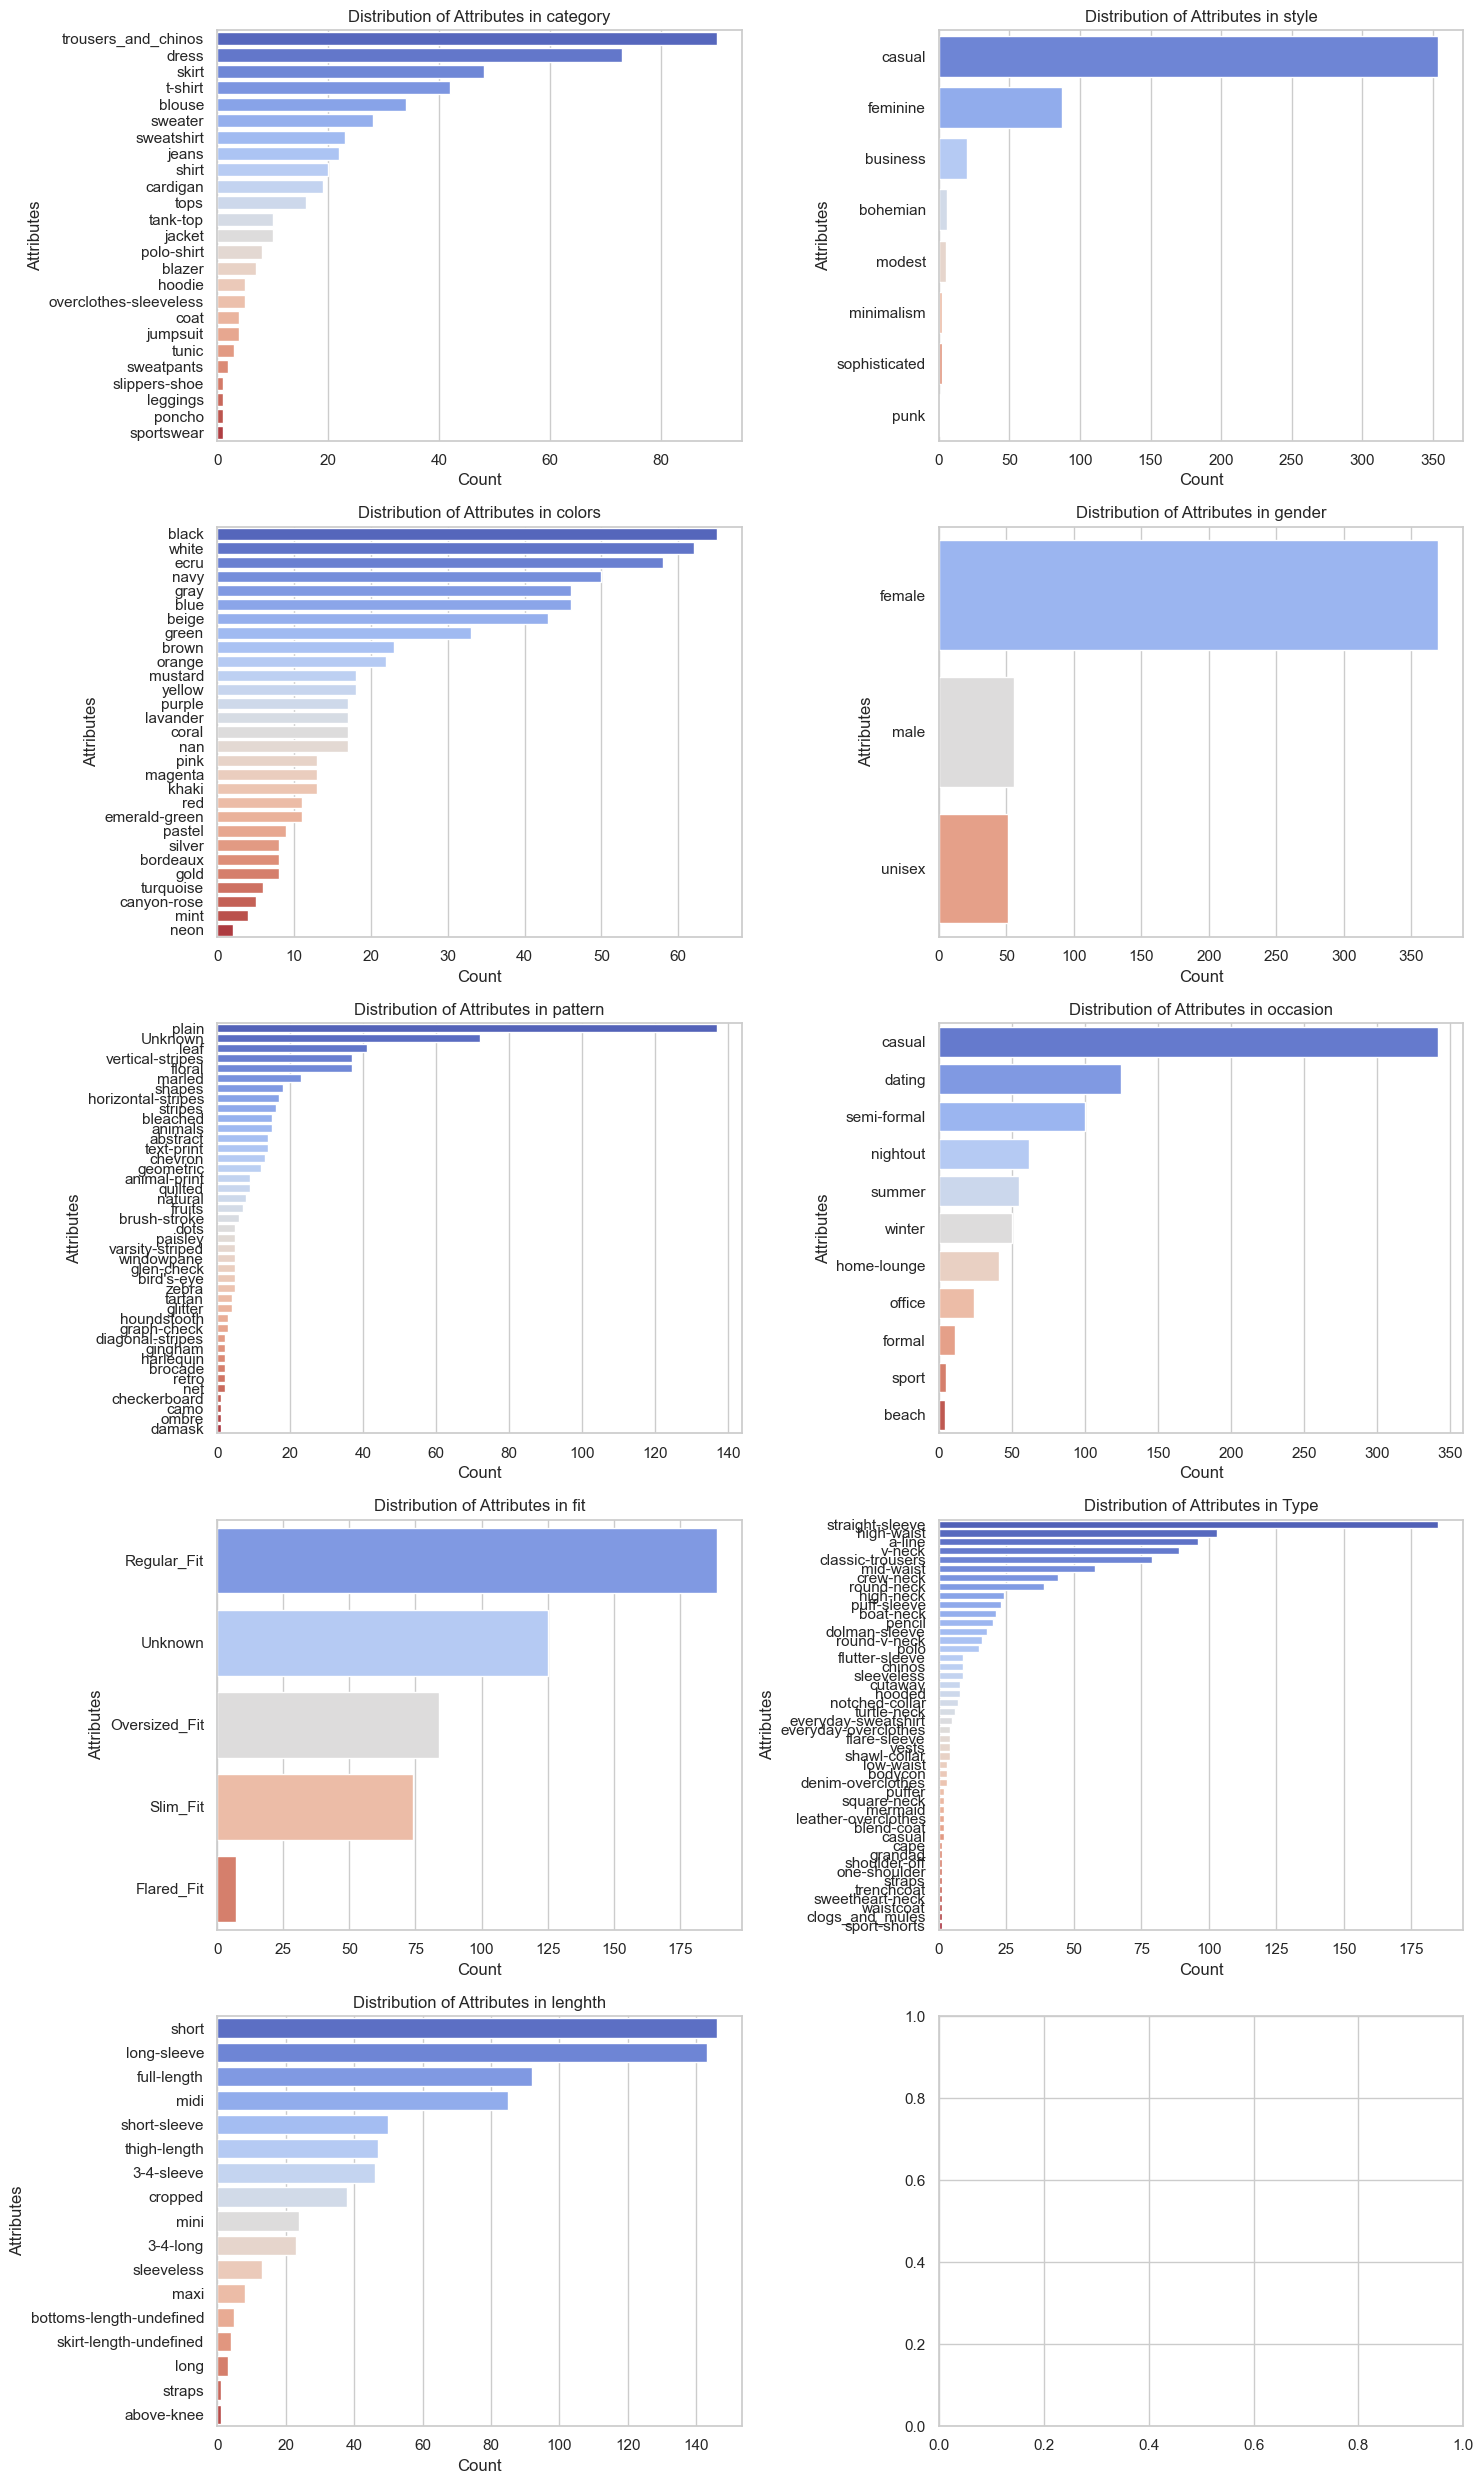

In [419]:
selected_columns = [col for col in df_Imputation.columns if col not in ['brand', 'image_url_1', 'barcode']]
plot_multivalued_columns(df_Imputation,selected_columns)

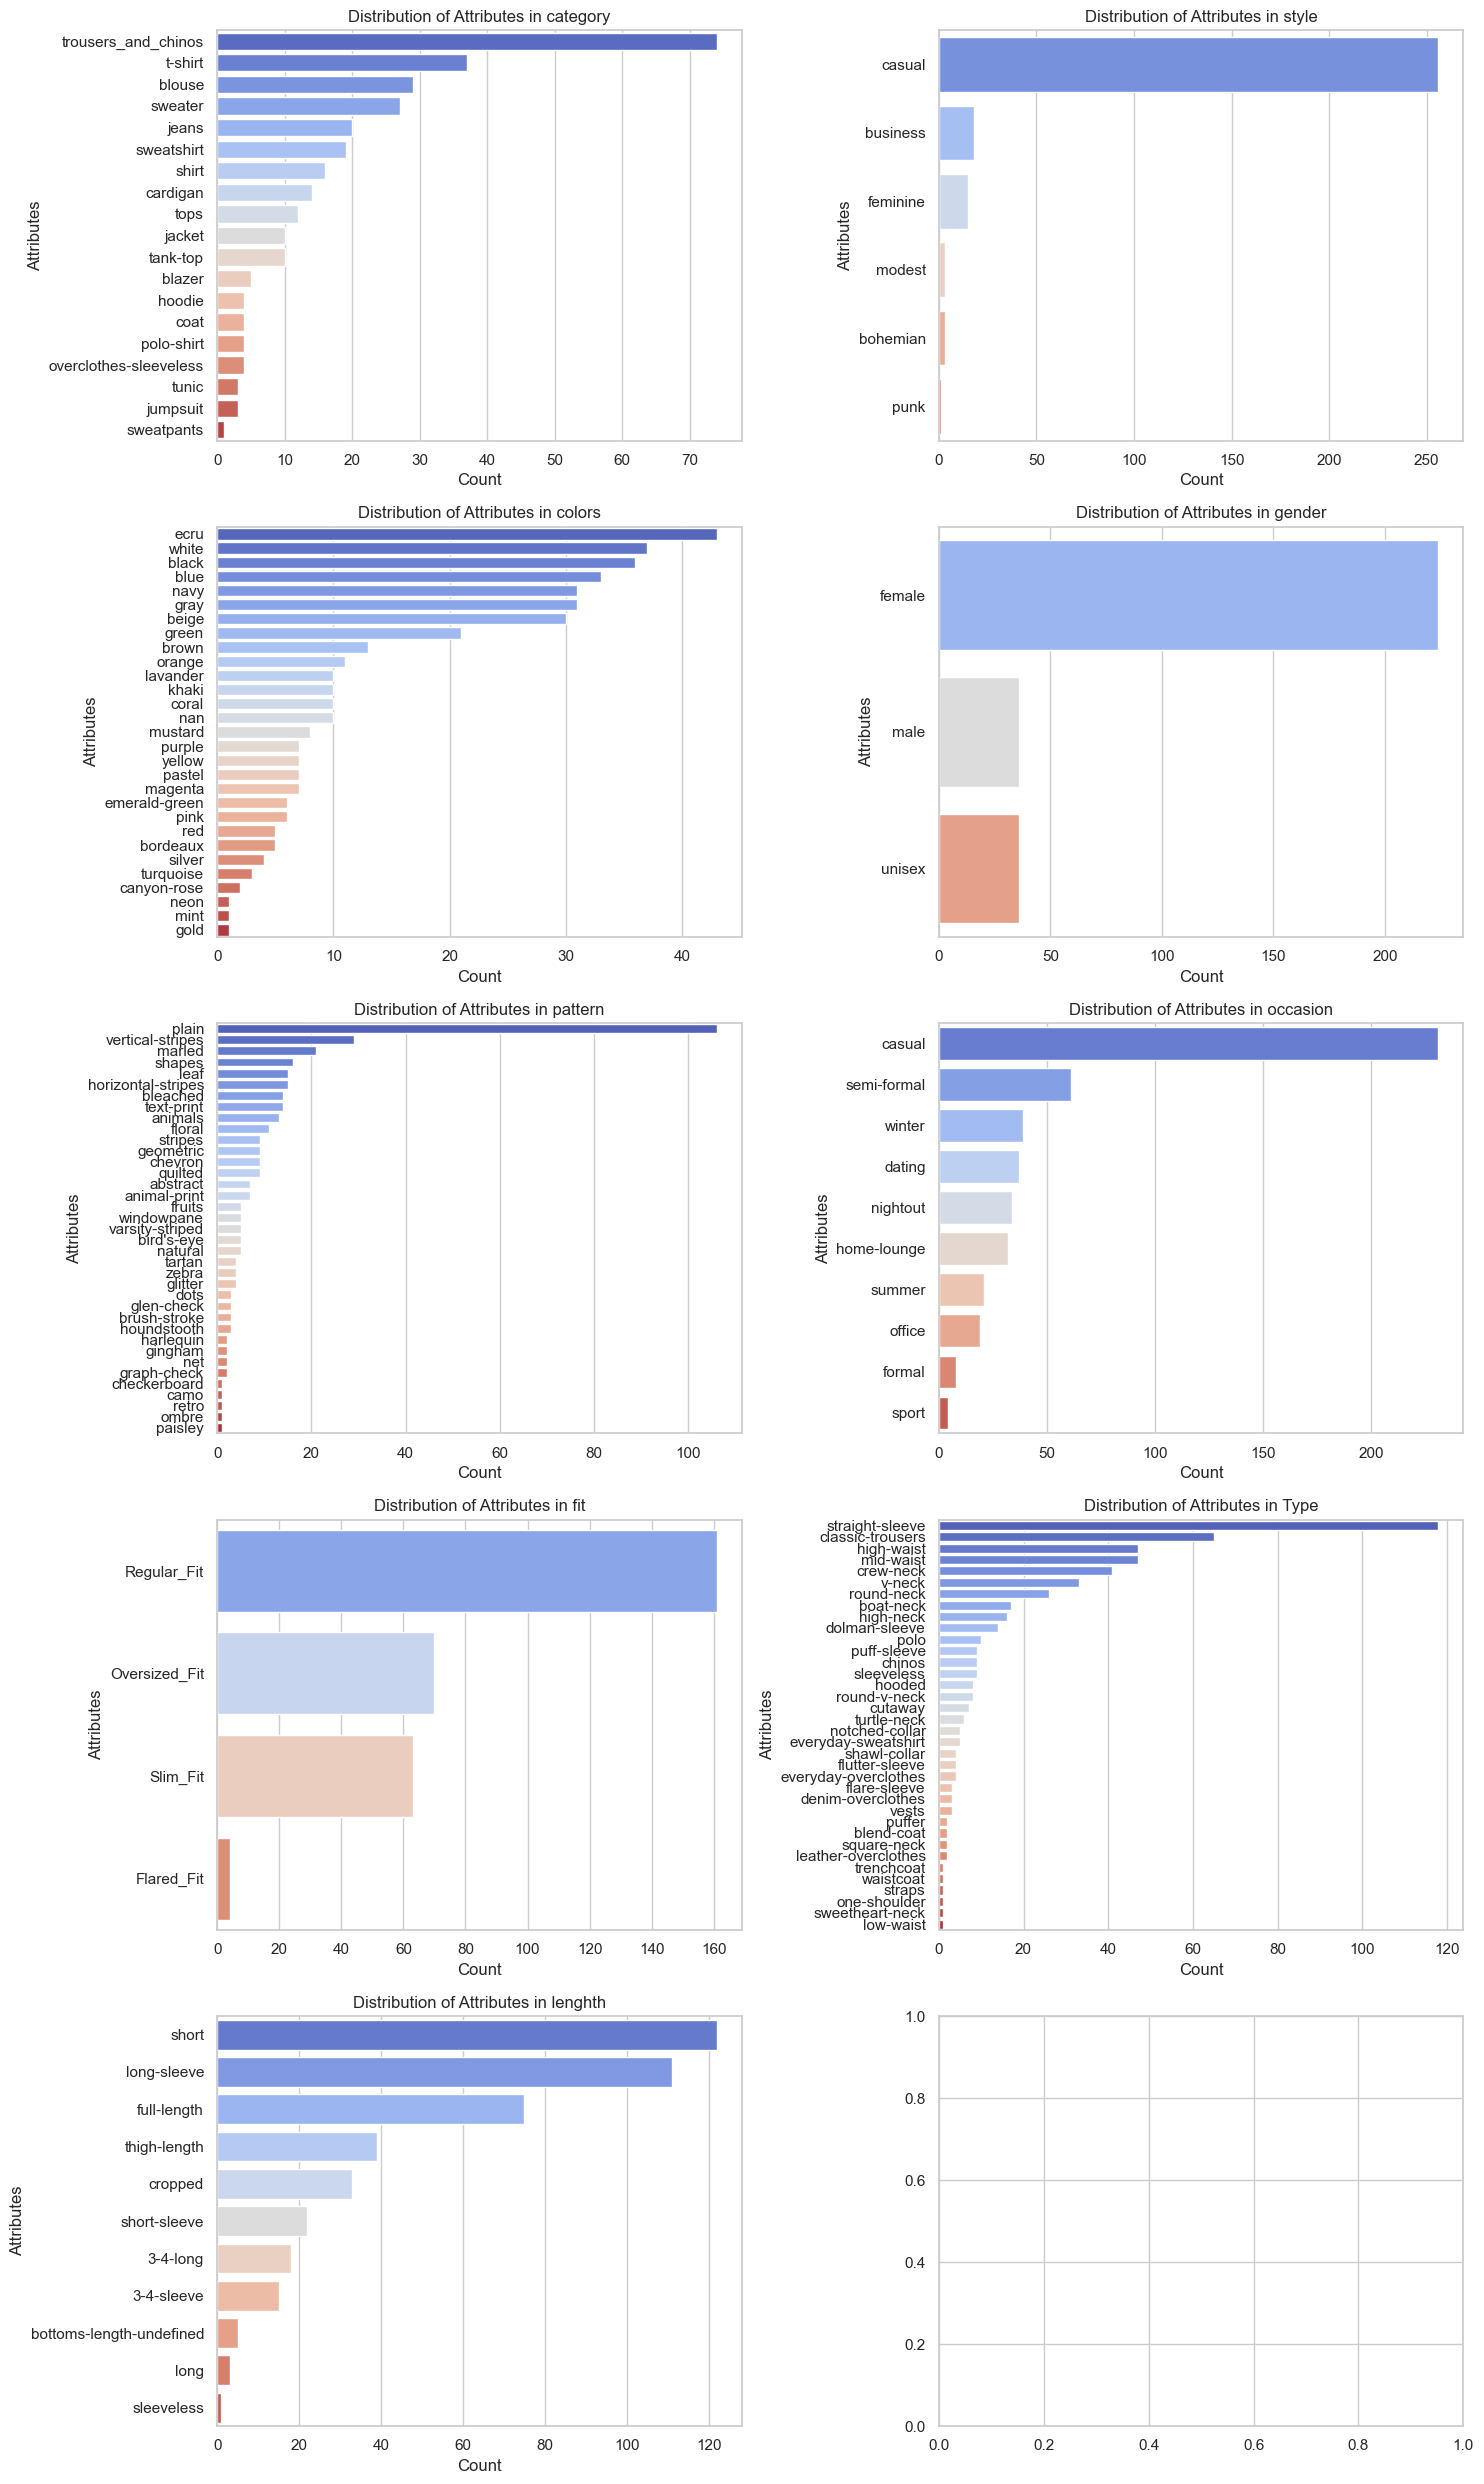

In [420]:
selected_columns2 = [col for col in df_Imputation.columns if col not in ['brand', 'image_url_1', 'barcode']]
plot_multivalued_columns(df_Drop,selected_columns)

In [430]:
def count_attributes_frequency(df, separator=";"):
    """
    Function to count the total number of attributes in each column and the frequency of each unique attribute.

    Parameters:
    df (DataFrame): The dataset.
    separator (str): The separator used to split multiple attributes (default is ";").

    Returns:
    dict: A dictionary where keys are column names and values are DataFrames showing attribute counts.
    """
    attribute_counts = {}
    selected_columns = [col for col in df.columns if col not in ['brand', 'image_url_1', 'barcode']]

    for column in selected_columns:
        # Drop NaN values, convert to string, and split attributes
        df_expanded = (
            df[column].dropna().astype(str)
            .str.split(separator)
            .explode()
            .str.strip()
        )
        
        # Get value counts
        attribute_count_df = df_expanded.value_counts().reset_index()
        attribute_count_df.columns = [column, "Frequency"]
        
        # Store in dictionary
        attribute_counts[column] = attribute_count_df

        # Print total attributes in column
        total_attributes = df_expanded.count()
        print(f"Column: {column} - Total Attributes: {total_attributes}\n")
        print(attribute_count_df.head(10))  # Display top 10 attributes for each column
        print("-" * 50)

    return attribute_counts

In [431]:
count_attributes_frequency(df_Imputation)

Column: category - Total Attributes: 477

              category  Frequency
0  trousers_and_chinos         90
1                dress         73
2                skirt         48
3              t-shirt         42
4               blouse         34
5              sweater         28
6           sweatshirt         23
7                jeans         22
8                shirt         20
9             cardigan         19
--------------------------------------------------
Column: style - Total Attributes: 477

           style  Frequency
0         casual        354
1       feminine         87
2       business         20
3       bohemian          6
4         modest          5
5     minimalism          2
6  sophisticated          2
7           punk          1
--------------------------------------------------
Column: colors - Total Attributes: 663

   colors  Frequency
0   black         65
1   white         62
2    ecru         58
3    navy         50
4    gray         46
5    blue         46
6   

{'category':                   category  Frequency
 0      trousers_and_chinos         90
 1                    dress         73
 2                    skirt         48
 3                  t-shirt         42
 4                   blouse         34
 5                  sweater         28
 6               sweatshirt         23
 7                    jeans         22
 8                    shirt         20
 9                 cardigan         19
 10                    tops         16
 11                tank-top         10
 12                  jacket         10
 13              polo-shirt          8
 14                  blazer          7
 15                  hoodie          5
 16  overclothes-sleeveless          5
 17                    coat          4
 18                jumpsuit          4
 19                   tunic          3
 20              sweatpants          2
 21           slippers-shoe          1
 22                leggings          1
 23                  poncho          1
 24          

In [432]:
count_attributes_frequency(df_Drop)

Column: category - Total Attributes: 296

              category  Frequency
0  trousers_and_chinos         74
1              t-shirt         37
2               blouse         29
3              sweater         27
4                jeans         20
5           sweatshirt         19
6                shirt         16
7             cardigan         14
8                 tops         12
9               jacket         10
--------------------------------------------------
Column: style - Total Attributes: 296

      style  Frequency
0    casual        256
1  business         18
2  feminine         15
3    modest          3
4  bohemian          3
5      punk          1
--------------------------------------------------
Column: colors - Total Attributes: 396

   colors  Frequency
0    ecru         43
1   white         37
2   black         36
3    blue         33
4    navy         31
5    gray         31
6   beige         30
7   green         21
8   brown         13
9  orange         11
-----------

{'category':                   category  Frequency
 0      trousers_and_chinos         74
 1                  t-shirt         37
 2                   blouse         29
 3                  sweater         27
 4                    jeans         20
 5               sweatshirt         19
 6                    shirt         16
 7                 cardigan         14
 8                     tops         12
 9                   jacket         10
 10                tank-top         10
 11                  blazer          5
 12                  hoodie          4
 13                    coat          4
 14              polo-shirt          4
 15  overclothes-sleeveless          4
 16                   tunic          3
 17                jumpsuit          3
 18              sweatpants          1,
 'style':       style  Frequency
 0    casual        256
 1  business         18
 2  feminine         15
 3    modest          3
 4  bohemian          3
 5      punk          1,
 'colors':            colors 

Some attributes have low frequency, which might require removal. However, I will keep them for now, as we may be able to group them with other attributes later. To do this effectively, we might need input from an expert.